## Digit Recognition with SVM

This project is for the Digit Recognizer competition, which is one of the introductory competitions to the computer vision in Kaggle. <br>
The goal is to correctly identify digits from a dataset of handwritten images. In this project, I use SVM(Support Vector Machine), the algorithm that classifies cases by finding a separator.<br>

### 1. Data

The data contains gray-scale images of hand-drawn digits, from zero through nine. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. This pixel-value is an integer between 0 and 255.<br>

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
# import csv files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [125]:
# Training data has 785 columns including labels
print('training data shape: ',train.shape)
print('test data shape: ',test.shape)

training data shape:  (42000, 785)
test data shape:  (28000, 784)


In [126]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

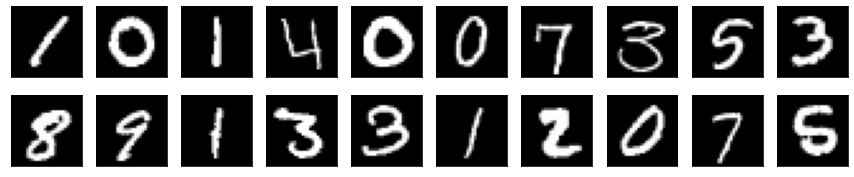

In [127]:
# Visualize some handwritting digits
fig, axes = plt.subplots(2,10,figsize=(15,3),subplot_kw={'xticks':(),'yticks':()})
for i,ax in enumerate(axes.ravel()):
    ax.imshow(train.iloc[i,1:].values.reshape(28,28),cmap='gray')

In [128]:
# Separate labels from the dataframe
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

### 2. Modeling

The steps to train the model are,
1. Split the data into a training set and test set 
2. Preprocess the training data (Scaling and Dimentionality reduction) 
3. Feed the preprocessed training data into model 
4. Find the optimal values of parameters generating the best score 
5. Check the score for the test data to see if it works the same with unseen data.<br>

The parameters need to be adjusted for SVC with rbf kernel are 'C' (the lower value corresponds to the stronger regularization) and 'gamma' (the lower value limit the influence of each training example). We make a pipeline for above steps and use GridSerchCV class to build the best estimater.

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=42)
print('X_train shape',X_train.shape)


X_train shape (29400, 784)


In [130]:
# Make a pipe line for scaling, dimentionality reduction, modeling
scaler = StandardScaler()
pca = PCA(n_components=100, random_state=42)
svc = SVC(kernel='rbf')
pipe = make_pipeline(scaler, pca, svc)

print('Pipeline steps: \n',pipe.steps)

Pipeline steps: 
 [('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=100, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))]


In [131]:
# Find the best model from training data
params = {'svc__C':[1,10,100],'svc__gamma':[0.0001,0.001,0.01]} # parameters grid

grid = GridSearchCV(pipe, params)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=100, random_state=42,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_s

In [132]:
# This is the model with the highest score on training set
grid.best_estimator_

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=100,
                     random_state=42, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svc',
                 SVC(C=10, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

### 3. Results

The best score on traing set: 0.9688 / The best score on test set  : 0.9690<br>
The optimal values of Parameters: C = 10, gamma = 0.001
<br>
Training score and test score are almost same. So the model was trained well without overfitting. <br><br>
*The score on Kaggle competition:  0.96971*

In [133]:
# Best score on training set
grid.best_score_

0.9688775510204082

In [134]:
# The score with test set
grid.score(X_test, y_test)

0.969047619047619

The best parameters: {'svc__C': 10, 'svc__gamma': 0.001}


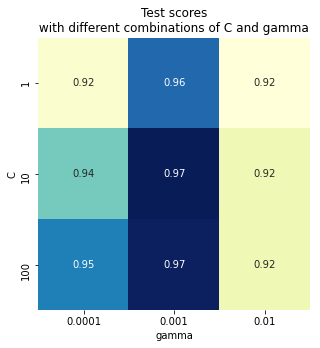

In [135]:
# Let's check if we still can adjust parameters better
# We can see the best score is in the ceter in the heat map
# which means we don't need to try larger/smaller values

results = pd.DataFrame(grid.cv_results_)
scores = np.array(results.mean_test_score).reshape(3,3)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(scores,square=True,annot=scores,xticklabels=[0.0001,0.001,0.01],
            yticklabels=[1,10,100],cmap="YlGnBu",cbar=False)
plt.xlabel('gamma')
plt.ylabel('C')
ax.set_title('Test scores\n with different combinations of C and gamma ')
print('The best parameters: {}'.format(grid.best_params_))

In [136]:
# Let's predict the digits from the data without label
prediction = grid.predict(test)

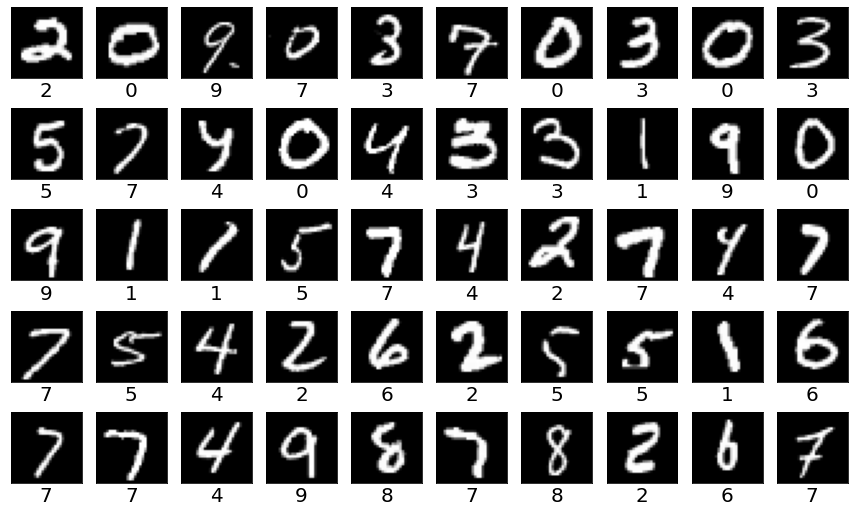

In [137]:
# Visualize the prediction for the first 50 images
fig, axes = plt.subplots(5,10,figsize=(15,9),subplot_kw={'xticks':(),'yticks':()})
for i,ax in enumerate(axes.ravel()):
    ax.imshow(test.iloc[i,:].values.reshape(28,28),cmap='gray')
    ax.set_xlabel(prediction[i],fontsize=20)

In [138]:
# Make a csv file for submission
df = pd.DataFrame(prediction,index=list(range(1,28001)))
df.reset_index(inplace=True)
df.columns= ['ImageId','Label']
submission = df.to_csv('submission.csv',header=True,index=False)